<a href="https://colab.research.google.com/github/Palak730/creditcarddefaultprediction/blob/main/Credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction




##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Palak Srivastava


# **Project Summary -**

The aim of this study is to exploit some supervised machine learning algorithms to identify the key drivers that determine the likelihood of credit card default, underlining the mathematical aspects behind the methods used. Credit card default happens when you have become severely delinquent on your credit card payments. In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, the overused credit card for consumption and accumulated heavy credit and debts

The goal is to build an automated model for both identifying the key factors, and predicting a credit card default based on the information about the client and historical transactions. The general concepts of the supervised machine learning paradigm are later reported, together with a detailed explanation of all techniques and algorithms used to build the models. In particular, Logistic Regression, Random Forest and Support Vector Machines algorithms have been applied.

# **GitHub Link -**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
import os

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/'
data=pd.read_csv(file_path + '/creditcardclients.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Convert integer columns to float
float_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL']
data[float_columns] = data[float_columns].astype(float)


###**Dataset Information**

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years
Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)
In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if customer will default or not.

So let's begin.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


First we will check if we have any null values

In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

 ## **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [ ]:
#renaming columns
data.rename(columns = {'default payment next month' : 'Defaulter'  },inplace=True )
data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
               'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# ***Exploratory Data Analysis***

## **Calculate the frequency of defaults and non-defaults credit cards**

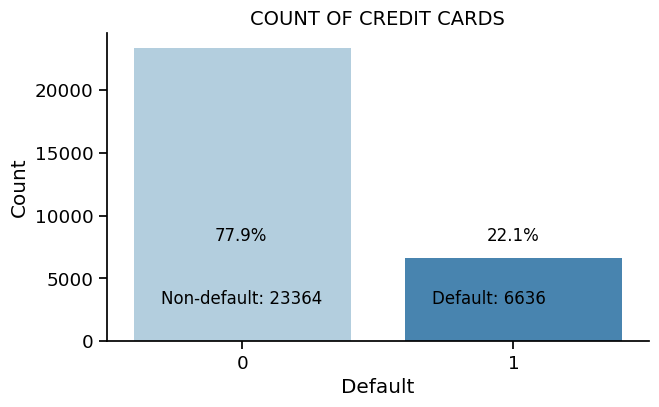

In [ ]:
# Calculate the frequency of defaults and non-defaults
yes = data['Defaulter'].sum()
no = len(data) - yes

# Calculate the percentage of defaults and non-defaults
total = len(data)
yes_perc = round(yes / total * 100, 1)
no_perc = round(no / total * 100, 1)

# Set the figure size and context
plt.figure(figsize=(7, 4))
sns.set_context('notebook', font_scale=1.2)

# Create the count plot
sns.countplot(x='Defaulter', data=data, palette="Blues")

# Annotate the counts and percentages
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc) + "%", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc) + "%", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)

# Set the title and axis labels
plt.title('COUNT OF CREDIT CARDS', size=14)
plt.xlabel('Default')
plt.ylabel('Count')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


From this sample of 30,000 credit card holders, there were 6,636 default credit cards; that is, the proportion of default in the data is 22,1%.         

##**SEX**


In [ ]:
data['SEX'].value_counts()

FEMALE    18112
MALE      11888
Name: SEX, dtype: int64

## **Education**


In [ ]:
# Filter the values 5, 6, and 0 in the 'EDUCATION' column and replace them with 'others'
condition = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0) | (data['EDUCATION'] == 4)
data.loc[condition, 'EDUCATION'] = 'others'

# Print the updated value counts for each category in the 'EDUCATION' column
print(data['EDUCATION'].value_counts())

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64


For values without descriptions (5, 6, 0), we can group them as "Others" and represent them as 4 in the dataset.

## **Marriage**



In [ ]:
# Filter the value 0 in the 'MARRIAGE' column and replace them with others using .loc
condition = (data['MARRIAGE'] == 0) | (data['MARRIAGE'] == 3)
data.loc[condition, 'MARRIAGE'] = 'others'
data['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

# **Plotting our categorical features**

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
# Create a new DataFrame 'df_cat' containing only the categorical features
df_cat = data[categorical_features].copy()

# Use .loc to set the 'Defaulter' column in 'df_cat' based on the 'Defaulter' column in the original 'data' DataFrame
df_cat.loc[:, 'Defaulter'] = data['Defaulter']

<Figure size 800x500 with 0 Axes>

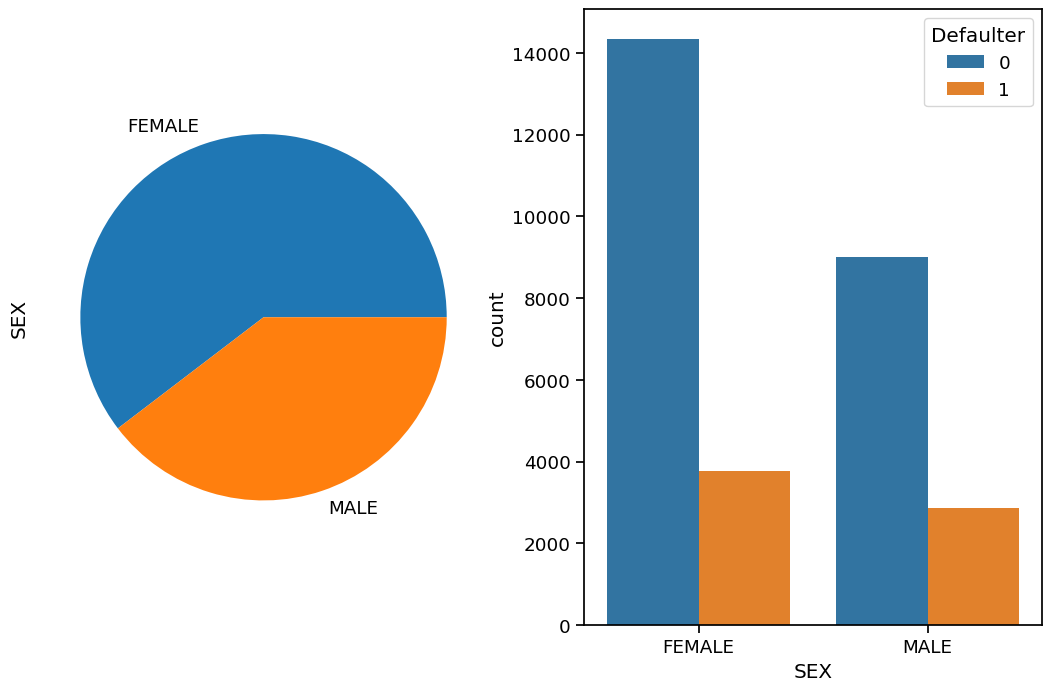

<Figure size 800x500 with 0 Axes>

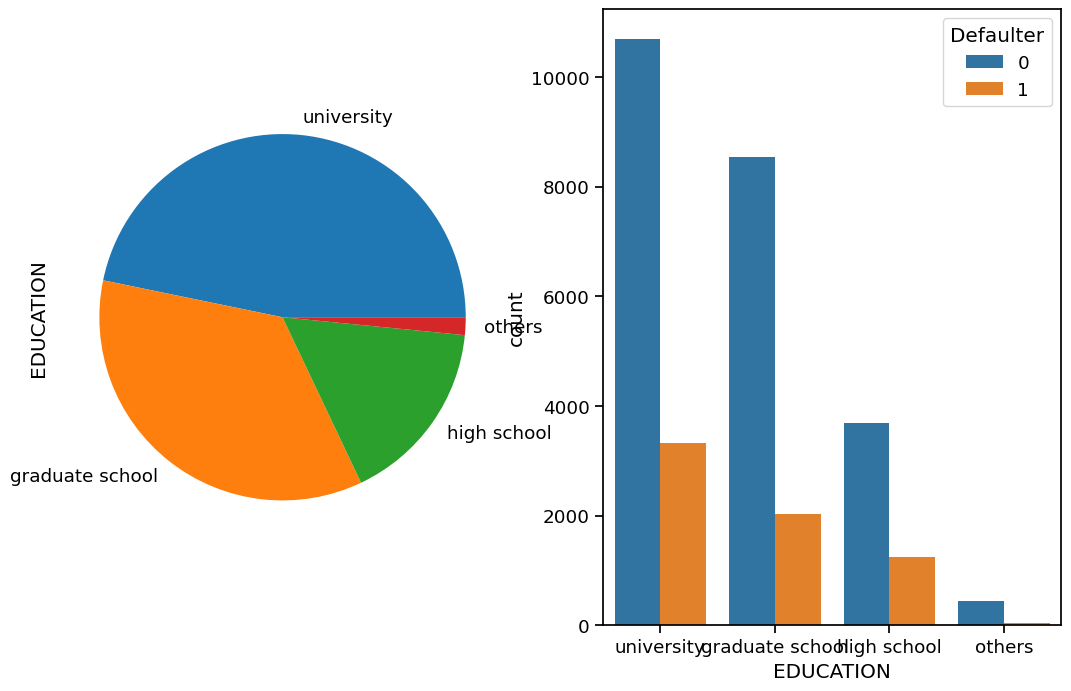

<Figure size 800x500 with 0 Axes>

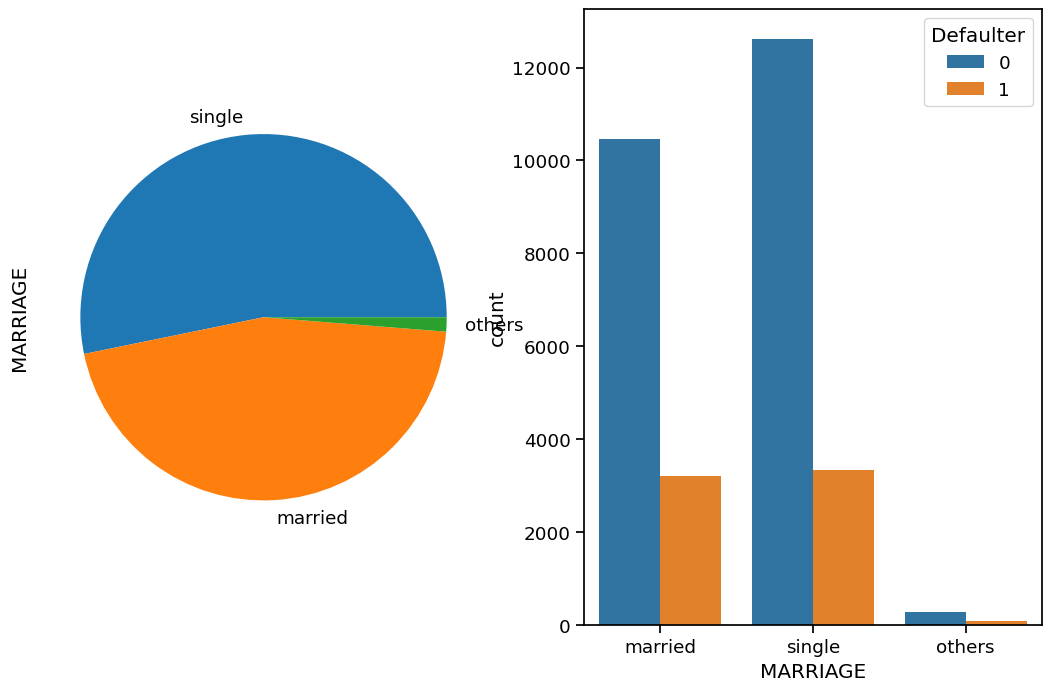

In [ ]:
for col in categorical_features:
  plt.figure(figsize=(8,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  data[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

## Observations for categorical features:

Gender: The majority of credit card holders who defaulted are females, indicating a higher proportion of female defaulters.

Education: Defaulters are more likely to be educated, with a higher proportion having completed graduate school or university education.

Marital Status: Defaulters are more likely to be singles, suggesting a higher proportion of single individuals among the group of credit card holders who defaulted.

### Limit Balance

In [ ]:
data['LIMIT_BAL'].max()


1000000.0

In [ ]:
data['LIMIT_BAL'].min()

10000.0

In [ ]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='Defaulter', ylabel='LIMIT_BAL'>

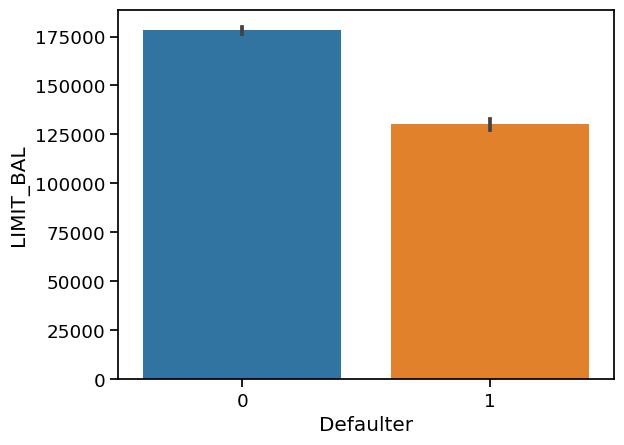

In [ ]:
sns.barplot(x='Defaulter', y='LIMIT_BAL', data=data)

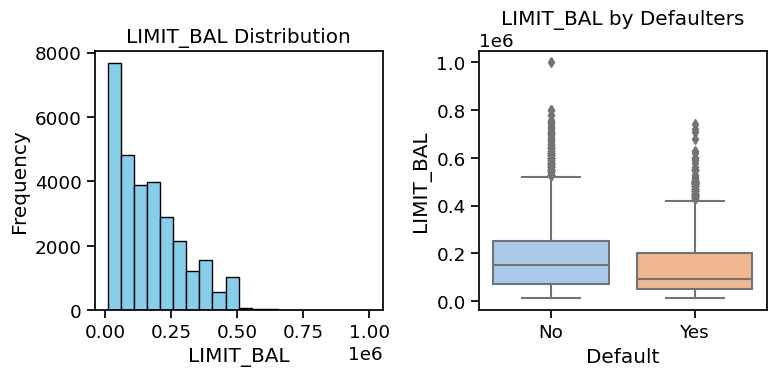

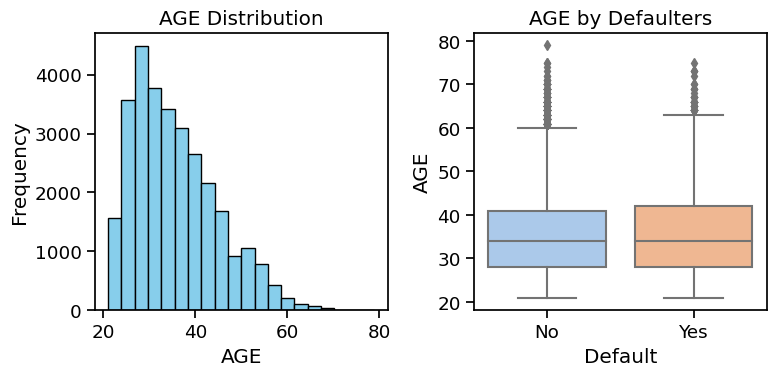

In [ ]:
# Explore the numerical features using histograms and box plots
numerical_features = ['LIMIT_BAL', 'AGE']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Defaulter', y=feature, data=data, palette='pastel')
    plt.xlabel('Default')
    plt.ylabel(feature)
    plt.title(f'{feature} by Defaulters')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


1. The 'LIMIT_BAL' histogram shows that a significant number of credit card holders have lower credit limits, while the 'AGE' histogram suggests a relatively uniform distribution across various age groups.

2. The box plots indicate that the median credit limit for customers who defaulted is slightly lower than those who did not default, but there are no significant differences in the median ages between defaulters and non-defaulters.

## **AGE**



In [ ]:
data['AGE'].value_counts()
data['AGE']=data['AGE'].astype('int')


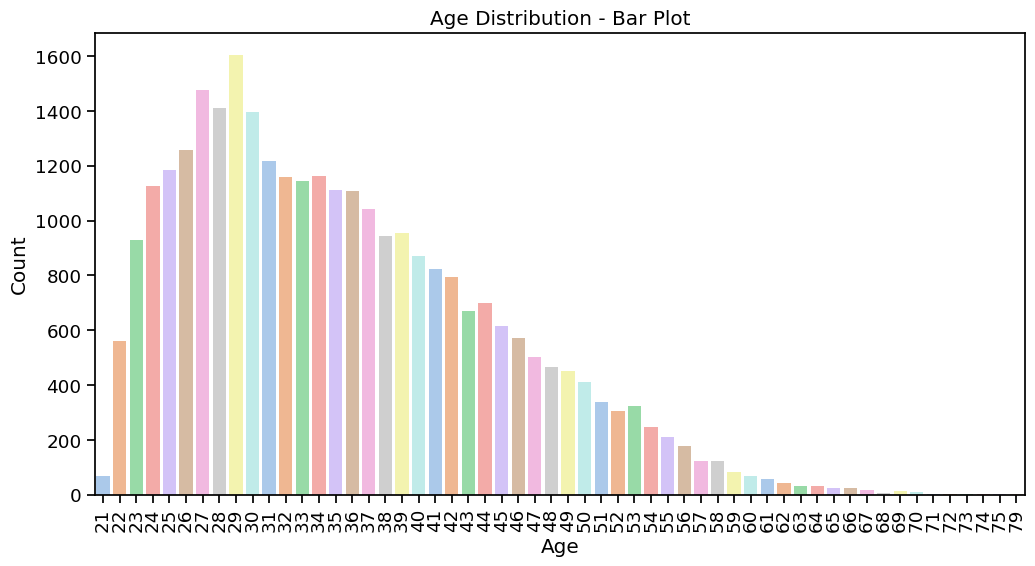

<Axes: xlabel='AGE', ylabel='count'>

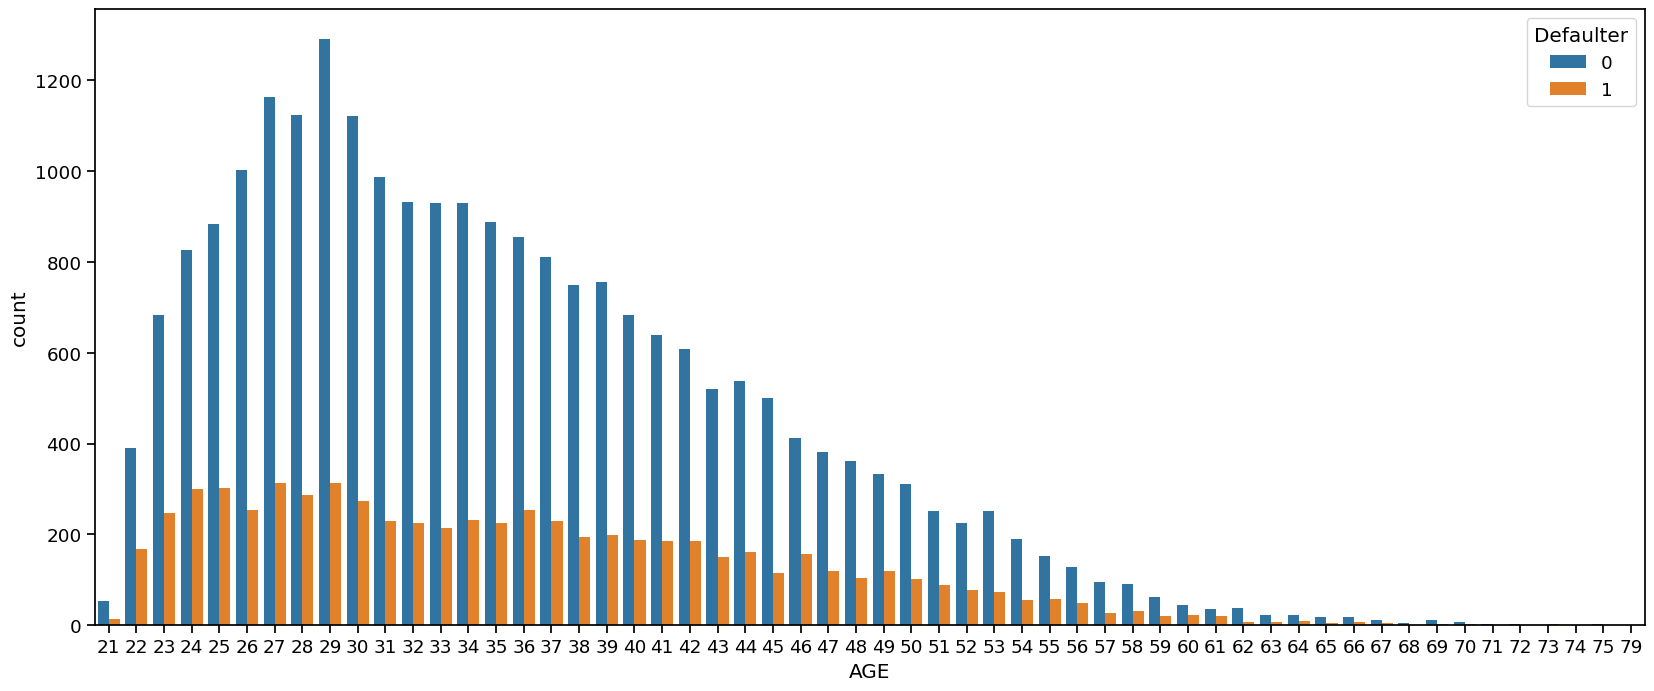

In [ ]:
# Create a bar plot for the age distribution
plt.figure(figsize=(12, 6))
age_counts_df = data['AGE'].value_counts().reset_index()
sns.barplot(x='index', y='AGE', data=age_counts_df, palette='pastel')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution - Bar Plot')
plt.xticks(rotation=90)
plt.show()

#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'Defaulter', data = data)

## **BILL AMOUNT**

Creating a pair plot to visualize the pairwise relationships and distributions among the bill amount columns from the original dataset.

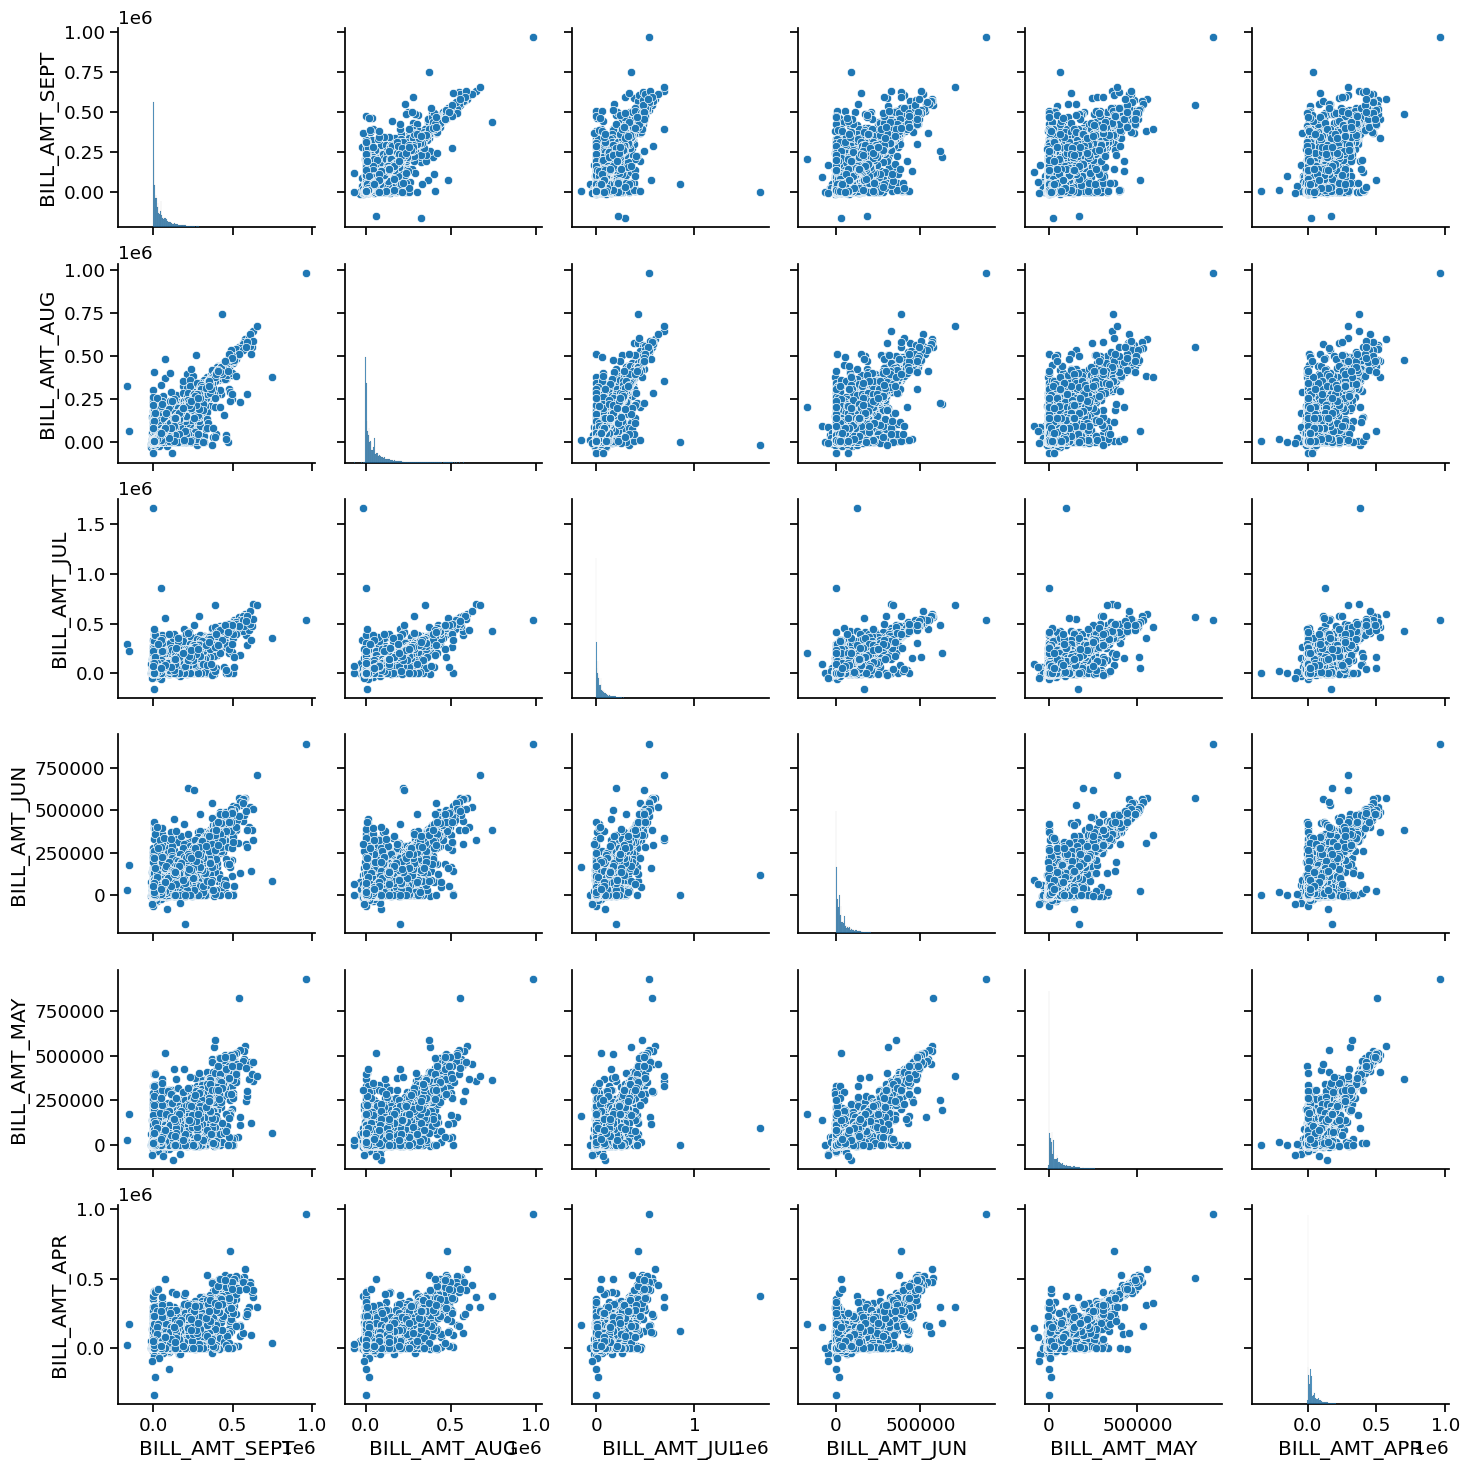

In [ ]:
# Selecting the bill amount columns
bill_amnt_df = data[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]

# Create a pair plot for the bill amount columns
sns.pairplot(data=bill_amnt_df)
plt.show()

**History payment status**

The count plots visualize the distribution of payment status for defaulters and non-defaulters in different months, providing insights into how payment behavior relates to the likelihood of defaulting.

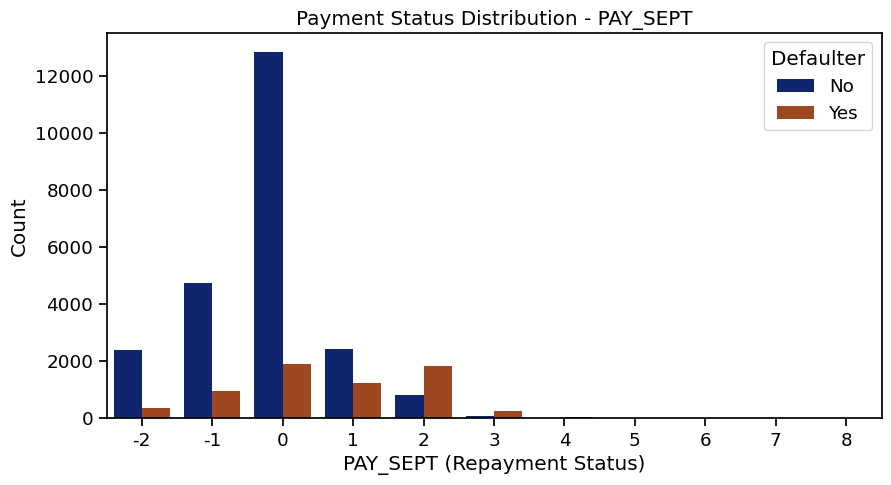

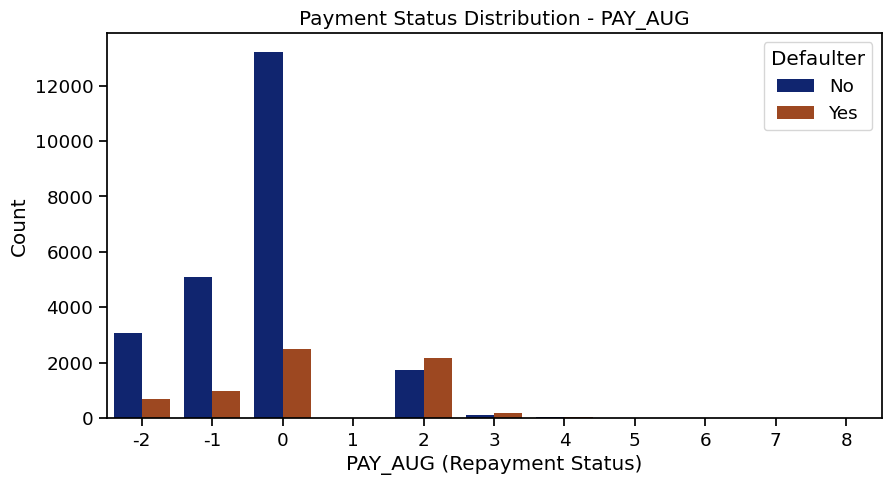

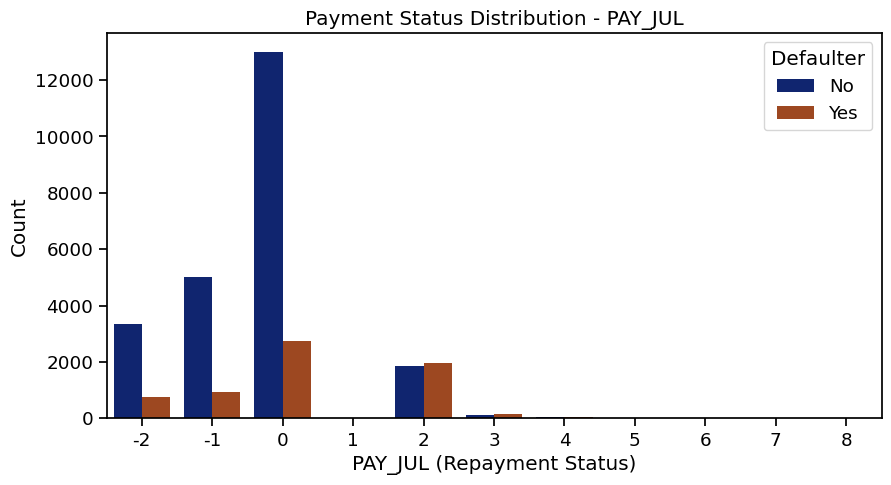

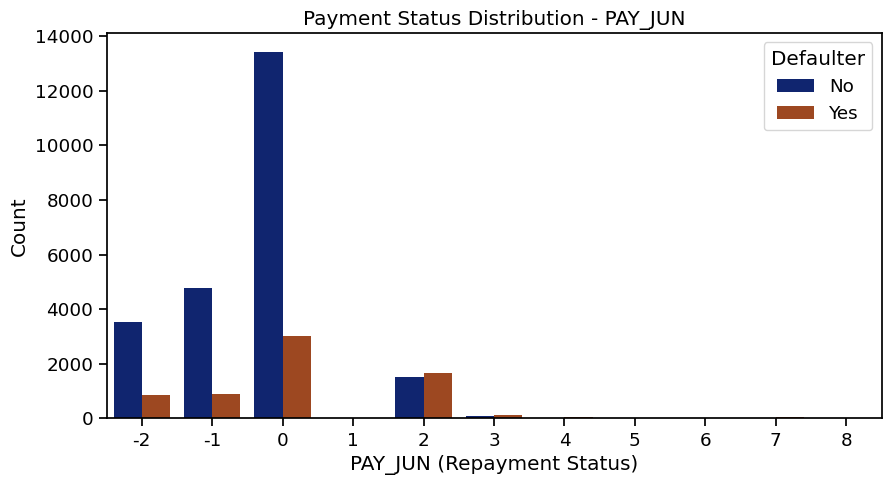

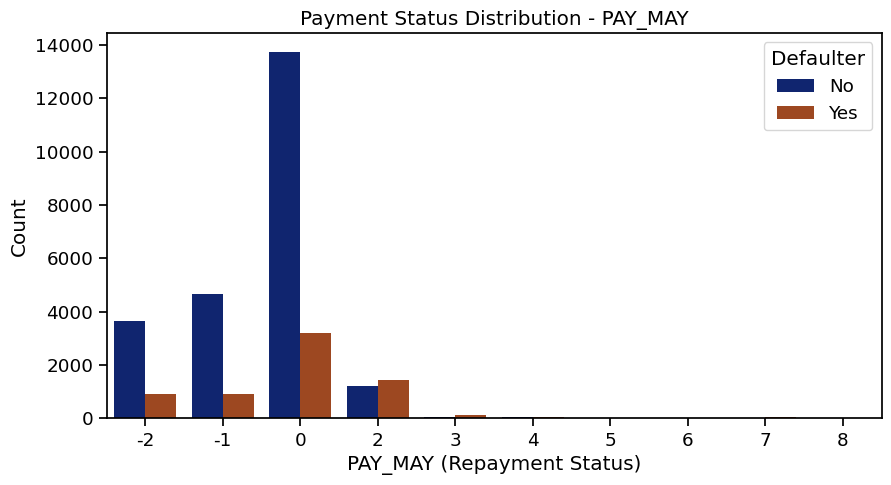

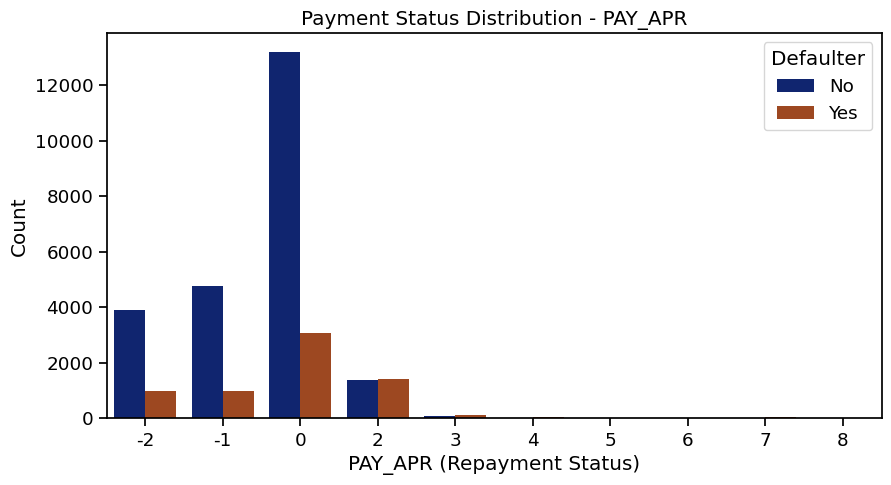

In [ ]:
# Selecting the payment status columns
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Create count plots for the payment status columns
for col in pay_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Defaulter', data=data, palette='dark')
    plt.xlabel(f'{col} (Repayment Status)')
    plt.ylabel('Count')
    plt.title(f'Payment Status Distribution - {col}')
    plt.legend(title='Defaulter', labels=['No', 'Yes'])
    plt.show()


### Correlation Heatmap

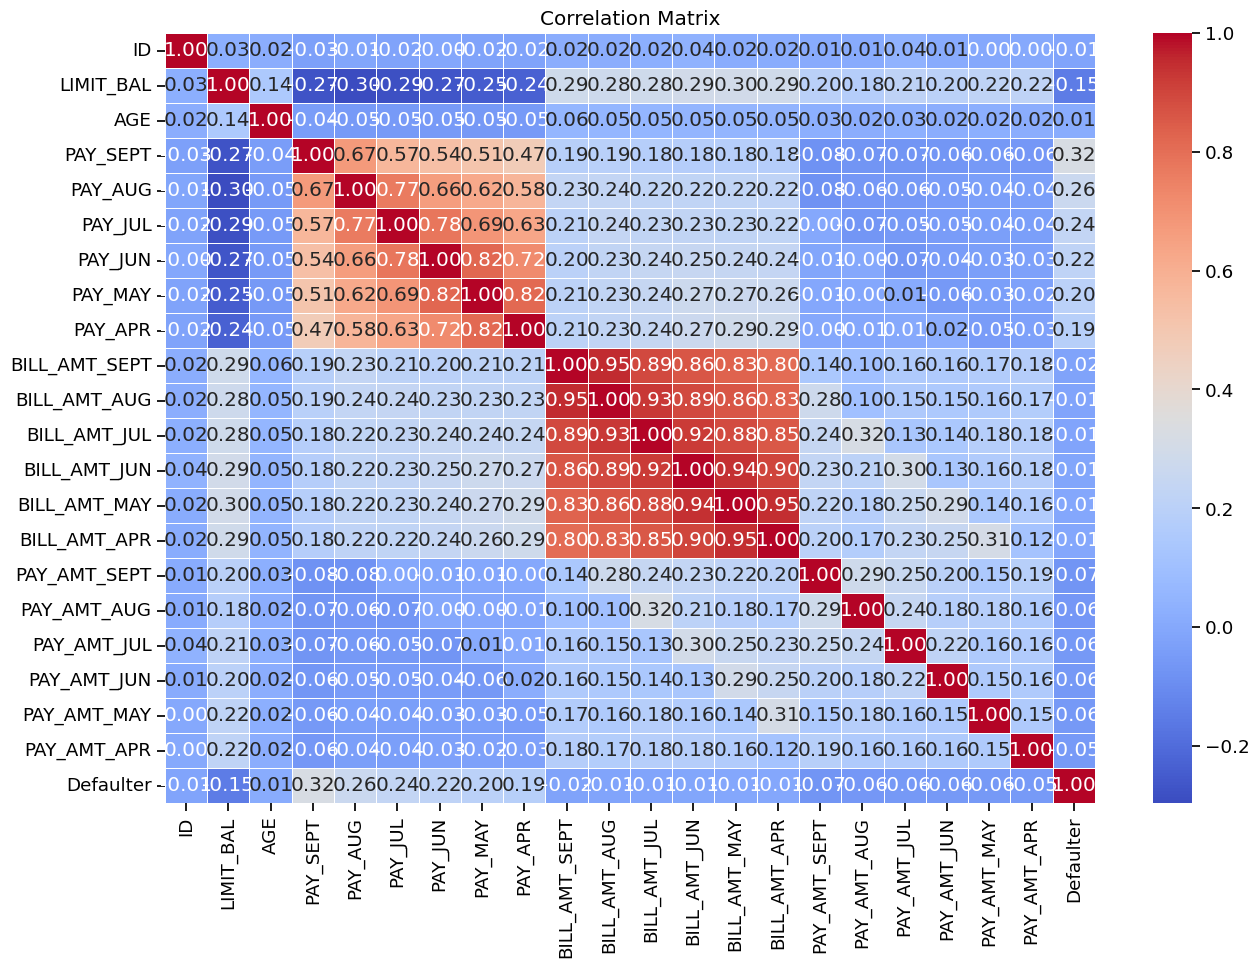

In [ ]:
# Calculate and visualize correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## **Label Incoding**

In [ ]:

data.replace({'SEX':{'FEMALE': 0, 'MALE' : 1},
               'EDUCATION' : { 'graduate school' : 1 ,  'university' :2 , 'high school' : 3,  'others' : 4},
               'MARRIAGE' : { 'married' : 1,  'single':2,  'others' : 3}}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             30000 non-null  int64  
 1   LIMIT_BAL      30000 non-null  float64
 2   SEX            30000 non-null  int64  
 3   EDUCATION      30000 non-null  int64  
 4   MARRIAGE       30000 non-null  int64  
 5   AGE            30000 non-null  int64  
 6   PAY_SEPT       30000 non-null  int64  
 7   PAY_AUG        30000 non-null  int64  
 8   PAY_JUL        30000 non-null  int64  
 9   PAY_JUN        30000 non-null  int64  
 10  PAY_MAY        30000 non-null  int64  
 11  PAY_APR        30000 non-null  int64  
 12  BILL_AMT_SEPT  30000 non-null  float64
 13  BILL_AMT_AUG   30000 non-null  float64
 14  BILL_AMT_JUL   30000 non-null  float64
 15  BILL_AMT_JUN   30000 non-null  float64
 16  BILL_AMT_MAY   30000 non-null  float64
 17  BILL_AMT_APR   30000 non-null  float64
 18  PAY_AM

## **One Hot Encoding**

In [ ]:
# Perform one-hot encoding for the 'EDUCATION' and 'MARRIAGE' columns
data = pd.get_dummies(data, columns=["EDUCATION", "MARRIAGE"])

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_MAY,PAY_AMT_APR,Defaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,0.0,0.0,1,0,1,0,0,1,0,0
1,2,120000.0,0,26,-1,2,0,0,0,2,...,0.0,2000.0,1,0,1,0,0,0,1,0
2,3,90000.0,0,34,0,0,0,0,0,0,...,1000.0,5000.0,0,0,1,0,0,0,1,0
3,4,50000.0,0,37,0,0,0,0,0,0,...,1069.0,1000.0,0,0,1,0,0,1,0,0
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,689.0,679.0,0,0,1,0,0,1,0,0


In [ ]:
data.drop(['EDUCATION_4', 'MARRIAGE_3'], axis=1, inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,1,0,1,0,1,0
1,2,120000.0,0,26,-1,2,0,0,0,2,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,1
2,3,90000.0,0,34,0,0,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,1
3,4,50000.0,0,37,0,0,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,1,0
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,0


In [ ]:
#creating dummy variables by droping firs variable
data = pd.get_dummies(data, columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,0,0,1,0,0,0,0,0,0,0


## ***6. Feature Engineering & Data Pre-processing***

#### Using SMOTE (Synthetic Minority Oversampling Technique) to remediate class imbalance is a common approach in machine learning when dealing with imbalanced datasets. SMOTE is a technique that generates synthetic samples for the minority class by interpolating between existing samples.

In [ ]:
# Assuming you have your DataFrame named 'data' with features and the target column 'Defaulter'

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data[(i for i in list(data.describe(include='all').columns) if i != 'Defaulter')], data['Defaulter'])

print('Original unbalanced dataset shape', len(data))
print('Resampled balanced dataset shape', len(y_smote))


Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
# Create the balanced DataFrame 'balanced_data' from the resampled data
balanced_data = pd.DataFrame(x_smote, columns=[col for col in data.columns if col != 'Defaulter'])
# Add the 'Defaulter' column to the balanced DataFrame
balanced_data['Defaulter'] = y_smote

# Print the shape of the balanced DataFrame
print(balanced_data.shape)

(46728, 80)


In [ ]:
# Removing feature ID from dataset
balanced_data.drop('ID',axis = 1, inplace = True)


In [ ]:
balanced_data.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,Defaulter
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,1,0,0,0,0,0,0,0,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#seperating dependant and independant variabales
X = balanced_data[(list(i for i in list(balanced_data.describe(include='all').columns) if i != 'Defaulter'))]
y = balanced_data['Defaulter']

In [ ]:
X.shape

(46728, 78)

In [ ]:
y.shape

(46728,)

## Data Transformation

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Train Test Splitting

In [ ]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape


(37382, 78)

In [ ]:
X_test.shape

(9346, 78)

# **Models used for predictions:**

Random Forest

Decision Tree

Logistic Regression

Gradient Boosting

XGBoost

SVM






### **Random Forest Classifier**

In [ ]:
# Create and train the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)

# Class prediction of y on test data
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)


# Getting all scores for Random Forest Classifier on test data
train_accuracy_rf = accuracy_score( y_train ,y_train_pred_rf  )
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_score_rf = precision_score(y_test, y_pred_rf)
recall_score_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
roc_score_rf = roc_auc_score(y_test, y_pred_rf)

print("The accuracy on train data is:", round(train_accuracy_rf, 3))
print("The accuracy on test data is:", round(accuracy_rf, 3))
print("The precision on test data is:", round(precision_score_rf, 3))
print("The recall on test data is:", round(recall_score_rf, 3))
print("The f1 on test data is:", round(f1_score_rf, 3))
print("The roc_score on test data is:", round(roc_score_rf, 3))


The accuracy on train data is: 0.999
The accuracy on test data is: 0.865
The precision on test data is: 0.9
The recall on test data is: 0.821
The f1 on test data is: 0.859
The roc_score on test data is: 0.865


In [ ]:
# Random Forest
cm_rf_test = confusion_matrix(y_test, y_pred_rf)
# Example to print confusion matrix for Logistic Regression
print("\nConfusion Matrix for Random Forest - Test:")
print(cm_rf_test)


Confusion Matrix for Random Forest - Test:
[[4238  426]
 [ 838 3844]]


### **Decision Tree Classifier**

In [ ]:
# Create and train the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Class prediction of y on test data
y_pred_dt = dt_classifier.predict(X_test)
y_train_pred_dt = dt_classifier.predict(X_train)

# Getting all scores for Decision Tree Classifier on test data
train_accuracy_dt = accuracy_score(y_train_pred_dt, y_train)
accuracy_dt = accuracy_score(y_pred_dt, y_test)
precision_score_dt = precision_score(y_pred_dt, y_test)
recall_score_dt = recall_score(y_pred_dt, y_test)
f1_score_dt = f1_score(y_pred_dt, y_test)
roc_score_dt = roc_auc_score(y_pred_dt, y_test)

print("The accuracy on train data is:", round(train_accuracy_dt, 3))
print("The accuracy on test data is:", round(accuracy_dt, 3))
print("The precision on test data is:", round(precision_score_dt, 3))
print("The recall on test data is:", round(recall_score_dt, 3))
print("The f1 on test data is:", round(f1_score_dt, 3))
print("The roc_score on test data is:", round(roc_score_dt, 3))



The accuracy on train data is: 1.0
The accuracy on test data is: 0.792
The precision on test data is: 0.804
The recall on test data is: 0.786
The f1 on test data is: 0.795
The roc_score on test data is: 0.792


In [ ]:
# Decision Tree
cm_dt_test = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree - Test:")
print(cm_dt_test)


Confusion Matrix for Decision Tree - Test:
[[3671  993]
 [ 929 3753]]


### **Logistic Regression**

In [ ]:
# Create and train the Logistic Regression model
logi_classifier = LogisticRegression(solver='liblinear')
logi_classifier.fit(X_train, y_train)

# Class prediction of y
y_pred_logi = logi_classifier.predict(X_test)
y_train_pred_logi = logi_classifier.predict(X_train)

# Getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi ,y_train), 3)
accuracy_logi = round(accuracy_score(y_test, y_pred_logi), 3)
precision_score_logi = round(precision_score(y_test, y_pred_logi), 3)
recall_score_logi = round(recall_score(y_test, y_pred_logi), 3)
f1_score_logi = round(f1_score(y_test, y_pred_logi), 3)
roc_score_logi = round(roc_auc_score(y_test, y_pred_logi), 3)

print("The accuracy on train data is:", train_accuracy_logi)
print("The accuracy on test data is:", accuracy_logi)
print("The precision on test data is:", precision_score_logi)
print("The recall on test data is:", recall_score_logi)
print("The f1 on test data is:", f1_score_logi)
print("The roc_score on test data is: ", roc_score_logi)


The accuracy on train data is: 0.829
The accuracy on test data is: 0.824
The precision on test data is: 0.853
The recall on test data is: 0.783
The f1 on test data is: 0.817
The roc_score on test data is:  0.824


In [ ]:
# Logistic Regression
cm_logi_test = confusion_matrix(y_test, y_pred_logi)
#print confusion matrix for Logistic Regression
print("\nConfusion Matrix for Logistic Regression - Test:")
print(cm_logi_test)


Confusion Matrix for Logistic Regression - Test:
[[4023  641]
 [1029 3653]]


### **Gradient Boosting**

In [ ]:
# Create and train the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier( random_state=42)
gb_classifier.fit(X_train, y_train)

# Class prediction of y on test data
y_pred_gb = gb_classifier.predict(X_test)
y_train_pred_gb = gb_classifier.predict(X_train)

# Getting all scores for Gradient Boosting Classifier on test data
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_score_gb = precision_score(y_test, y_pred_gb)
recall_score_gb = recall_score( y_pred_gb, y_test)
f1_score_gb = f1_score(y_test, y_pred_gb)
roc_score_gb = roc_auc_score(y_test, y_pred_gb)

print("The accuracy on train data is:", round(train_accuracy_gb, 3))
print("The accuracy on test data is:", round(accuracy_gb, 3))
print("The precision on test data is:", round(precision_score_gb, 3))
print("The recall on test data is:", round(recall_score_gb, 3))
print("The f1 on test data is:", round(f1_score_gb, 3))
print("The roc_score on test data is:", round(roc_score_gb, 3))


The accuracy on train data is: 0.846
The accuracy on test data is: 0.841
The precision on test data is: 0.88
The recall on test data is: 0.88
The f1 on test data is: 0.833
The roc_score on test data is: 0.841


In [ ]:
# Gradient Boosting
cm_gb_test = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix for Gradient Boosting - Test:")
print(cm_gb_test)



Confusion Matrix for Gradient Boosting - Test:
[[4160  504]
 [ 983 3699]]


### **XGBoost Classifier**

In [ ]:
# Train and predict using XGBoost
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Class prediction of y on test data
y_pred_xgb = xgb_classifier.predict(X_test)
y_train_pred_xgb = xgb_classifier.predict(X_train) # Predict on train data

# Getting all scores for  XBoosting Classifier on test data
train_accuracy_xgb = accuracy_score( y_train_pred_xgb, y_train)
accuracy_xgb = accuracy_score( y_pred_xgb , y_test)
precision_score_xgb = precision_score(y_pred_xgb , y_test)
recall_score_xgb = recall_score(y_pred_xgb , y_test)
f1_score_xgb = f1_score(y_pred_xgb , y_test)
roc_score_xgb = roc_auc_score(y_pred_xgb , y_test)

print("The accuracy on train data is:", round(train_accuracy_xgb, 3))
print("The accuracy on test data is:", round(accuracy_xgb, 3))
print("The precision on test data is:", round(precision_score_xgb, 3))
print("The recall on test data is:", round(recall_score_xgb, 3))
print("The f1 on test data is:", round(f1_score_xgb, 3))
print("The roc_score on test data is:", round(roc_score_xgb, 3))



The accuracy on train data is: 0.908
The accuracy on test data is: 0.856
The precision on test data is: 0.804
The recall on test data is: 0.897
The f1 on test data is: 0.848
The roc_score on test data is: 0.859


In [ ]:
# XG Boosting
cm_xgb_test = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix for XG Boosting - Test:")
print(cm_xgb_test)



Confusion Matrix for XG Boosting - Test:
[[4232  432]
 [ 918 3764]]


### **SVM Classifier**

In [ ]:
# Create and train the SVM Classifier model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Class prediction of y on test data
y_pred_svm = svm_classifier.predict(X_test)
y_train_pred_svm = svm_classifier.predict(X_train)

# Getting all scores for SVM Classifier on test data
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_score_svm = precision_score(y_test, y_pred_svm)
recall_score_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
roc_score_svm = roc_auc_score(y_test, y_pred_svm)

print("The accuracy on train data is:", round(train_accuracy_svm, 3))
print("The accuracy on test data is:", round(accuracy_svm, 3))
print("The precision on test data is:", round(precision_score_svm, 3))
print("The recall on test data is:", round(recall_score_svm, 3))
print("The f1 on test data is:", round(f1_score_svm, 3))
print("The roc_score on test data is:", round(roc_score_svm, 3))


The accuracy on train data is: 0.816
The accuracy on test data is: 0.809
The precision on test data is: 0.822
The recall on test data is: 0.79
The f1 on test data is: 0.805
The roc_score on test data is: 0.809


In [ ]:
# SVM
cm_svm_test = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for Logistic Regression - Test:")
print(cm_svm_test)




Confusion Matrix for Logistic Regression - Test:
[[3862  802]
 [1021 3661]]


## **Evaluating the models**

In [ ]:
# Define the evaluation metrics for each classifier
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
train_accuracy = [train_accuracy_logi, train_accuracy_dt, train_accuracy_rf, train_accuracy_svm, train_accuracy_gb, train_accuracy_xgb]
test_accuracy = [accuracy_logi, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_xgb]
precision_score = [precision_score_logi, precision_score_dt, precision_score_rf, precision_score_svm, precision_score_gb, precision_score_xgb]
recall_score = [recall_score_logi, recall_score_dt, recall_score_rf, recall_score_svm, recall_score_gb, recall_score_xgb]
f1_score = [f1_score_logi, f1_score_dt, f1_score_rf, f1_score_svm, f1_score_gb, f1_score_xgb]
auc_score = [roc_score_logi, roc_score_dt, roc_score_rf, roc_score_svm, roc_score_gb, roc_score_xgb]


In [ ]:
# Create a DataFrame to store the results
metrics =pd.DataFrame({
    'Classifier': classifiers,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'AUC': auc_score
})

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Round off the values to 3 decimal places
metrics_df = metrics_df.round(3)
metrics_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.829,0.824,0.853,0.783,0.817,0.824
1,Decision Tree,1.000,0.792,0.804,0.786,0.795,0.792
2,Random Forest,0.999,0.865,0.900,0.821,0.859,0.865
3,SVM,0.816,0.809,0.822,0.790,0.805,0.809
4,Gradient Boosting,0.846,0.841,0.880,0.880,0.833,0.841
5,XG Boosting,0.908,0.856,0.804,0.897,0.848,0.859


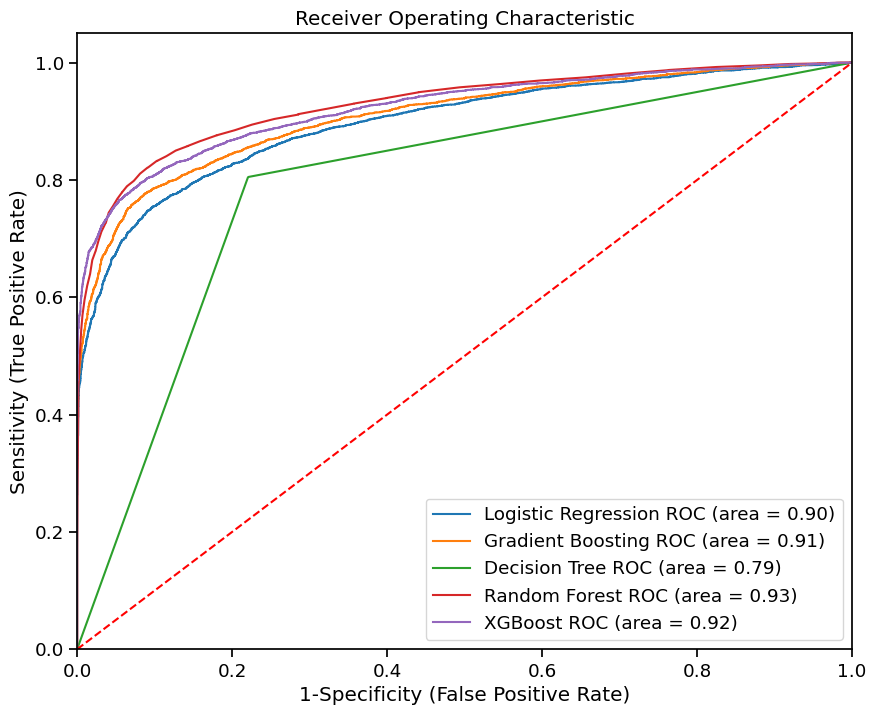

In [ ]:
from sklearn import metrics

# Define the models and their classifiers
models = [logi_classifier, gb_classifier, svm_classifier, dt_classifier, rf_classifier, xgb_classifier]
model_names = ['Logistic Regression', 'Gradient Boosting', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for i, model in enumerate(models):
    if hasattr(model, 'predict_proba'):  # Check if the classifier has the predict_proba method
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
        auc = metrics.roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model_names[i], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



### As you can see, Random Forest has the highest ROC AUC score, indicating that it has the best performance among the models you have evaluated.

### Mean Accuracy (coss-validation)

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter
gb_model = GradientBoostingClassifier()
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
# Perform 5-fold cross-validation and get the accuracy scores for each fold
cv_accuracy_scoreslg = cross_val_score(logistic_model, X_scaled, y, cv=5, scoring='accuracy')
cv_accuracy_scoresgb = cross_val_score(gb_model, X_scaled, y, cv=5, scoring='accuracy')
cv_accuracy_scoressvm = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')
cv_accuracy_scoresdt = cross_val_score(dt_model, X_scaled, y, cv=5, scoring='accuracy')
cv_accuracy_scoresrf = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='accuracy')
cv_accuracy_scoresxgb = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy_lg = cv_accuracy_scoreslg.mean()
mean_accuracy_gb = cv_accuracy_scoresgb.mean()
mean_accuracy_svm = cv_accuracy_scoressvm.mean()
mean_accuracy_dt = cv_accuracy_scoresdt.mean()
mean_accuracy_rf = cv_accuracy_scoresrf.mean()
mean_accuracy_xgb = cv_accuracy_scoresxgb.mean()
print("Mean Accuracy (logistic_model):", mean_accuracy_lg)
print("Mean Accuracy (gb_model):", mean_accuracy_gb)
print("Mean Accuracy (svm_model):", mean_accuracy_svm)
print("Mean Accuracy (dt_model):", mean_accuracy_dt)
print("Mean Accuracy (rf_model):", mean_accuracy_rf)
print("Mean Accuracy (xgb_model):", mean_accuracy_xgb)

Mean Accuracy (logistic_model): 0.8146541250998846
Mean Accuracy (gb_model): 0.8324378918452451
Mean Accuracy (svm_model): 0.8251193536128507
Mean Accuracy (dt_model): 0.7819538239607631
Mean Accuracy (rf_model): 0.8543307918386844
Mean Accuracy (xgb_model): 0.8355843622911671


The random forest model achieved the highest mean accuracy of approximately 0.854, making it the most effective model for the classification task.

# **Conclusion**

####**Model Performance**: Among the evaluated models, Random Forest and XGBoost demonstrated the strongest performance in classifying the target variable, with ROC AUC scores of 0.93 and 0.92 respectively.

####**Prediction Precision**: Random Forest showed exceptional precision, minimizing false positives and accurately identifying positive cases. This could be crucial in real-world applications where false positives are costly.

####**Model Complexity:** While Decision Tree exhibited lower performance, its simplicity makes it interpretable. Trade-offs between complexity and accuracy must be considered.

####**Convergence Optimization:** Logistic Regression required adjustments to its iteration limit to avoid convergence warnings, highlighting the importance of convergence optimization techniques.

#### **Mean accuracy:** Based on the mean accuracy scores obtained through cross-validation, the Random Forest model demonstrated the highest performance, achieving an accuracy of approximately 85.4%.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***